<a href="https://colab.research.google.com/github/KBerry-050/data-science-portfolio/blob/main/Module_2_Assignment_Berry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries for EDA and visualization
import pandas as pd
import numpy as np
from numpy import mean, absolute, sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# INGEST


In [ ]:
# read in train dataset, create DF, look at first 5 records
df_train = pd.read_csv("train.csv")
df_train = pd.DataFrame(data)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,new_score
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,11970
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,7572
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,12502
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,12019
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,17584


# EDA

In [ ]:
# investigate the dependent variable - see basic descriptive stats
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice'>

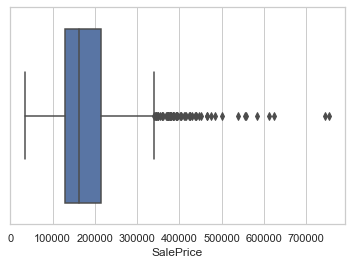

In [ ]:
# create boxplot to visualize the distribution of data
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_train["SalePrice"])

In [ ]:
# check to see how many records fall outside of one standard deviation from the mean
high = (df_train['SalePrice'] >= 257000).sum()
low = (df_train['SalePrice'] <= 103000).sum()

print("The number of house prices outside of 1 std. deviation is: ", high + low)
print("The percentage of total records that fall outside 1 std. dev. is: ",(high+low)/1460)

The number of house prices outside of 1 std. deviation is:  332
The percentage of total records that fall outside 1 std. dev. is:  0.2273972602739726


In [ ]:
# check for missing data by column
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
new_score          0
Length: 82, dtype: int64

In [ ]:
# now get the total number of missing values in the whole dataset
df_train.isnull().sum().sum()

6965

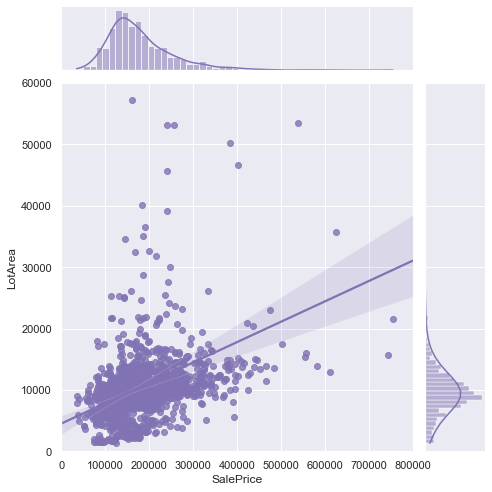

In [ ]:
# create a joint scatterplot and distribution chart to view relationship between lot area and sale price
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="SalePrice", y="LotArea", data=df_train,
                  kind="reg", truncate=False,
                  xlim=(0, 800000), ylim=(0, 60000),
                  color="m", height=7)

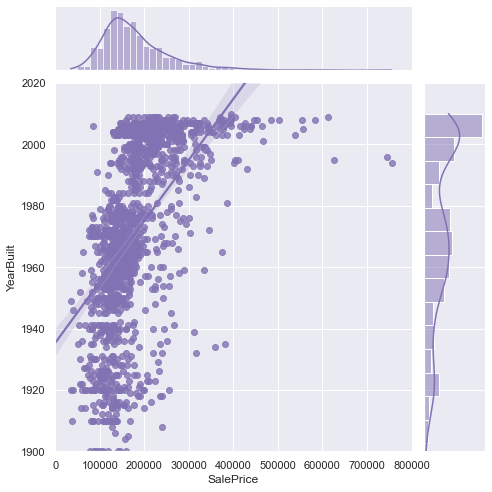

In [ ]:
# create a joint scatterplot and distribution chart to view relationship between year built and sale price
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="SalePrice", y="YearBuilt", data=df_train,
                  kind="reg", truncate=False,
                  xlim=(0, 800000), ylim=(1900, 2020),
                  color="m", height=7)

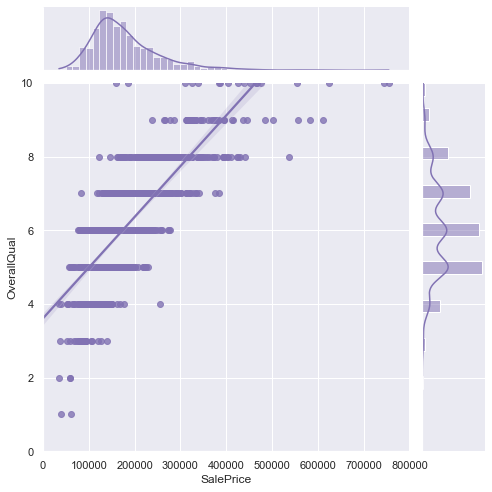

In [ ]:
# create a joint scatterplot and histogram to view relationship between overall quality and sale price
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="SalePrice", y="OverallQual", data=df_train,
                  kind="reg", truncate=False,
                  xlim=(0, 800000), ylim=(0, 10),
                  color="m", height=7)

In [ ]:
# check correlation for each input variable
corr = df_train.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
new_score        0.832057
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr

# FEATURE ENGINEERING

In [ ]:
# create new variable - overall quality x above ground living area square feet
df_train['LivArea_Qual'] = df_train['OverallQual'] * df_train['GrLivArea']

corr = df_train.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
LivArea_Qual     0.832057
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr

In [ ]:
# convert Years column to int, then create new variable - years since remodel x overall quality
df_train['YearRemodAdd'] = df_train['YearRemodAdd'].astype(int)
df_train['YearBuilt'] = df_train['YearBuilt'].astype(int)


num_years = df_train['YrSold'] - df_train['YearRemodAdd']
num_years = 100 - num_years
df_train['Home_Age_Qual'] = num_years * df_train['OverallQual']

# check basic descriptive stats about new feature
df_train.Home_Age_Qual.describe()


count    1460.000000
mean      485.715068
std       204.292734
min        41.000000
25%       300.000000
50%       476.000000
75%       658.000000
max      1010.000000
Name: Home_Age_Qual, dtype: float64

In [ ]:
# check correlation with new feature
corr = df_train.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
LivArea_Qual     0.832057
OverallQual      0.790982
Home_Age_Qual    0.752034
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorc

In [ ]:
# create new df of columns with correlation above .6
new_df = pd.DataFrame(data=df_train, columns = ["SalePrice","LivArea_Qual","OverallQual","Home_Age_Qual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF"])
new_df

,SalePrice,LivArea_Qual,OverallQual,Home_Age_Qual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF
0,208500,11970,7,665,1710,2,548,856,856
1,181500,7572,6,414,1262,2,460,1262,1262
2,223500,12502,7,658,1786,2,608,920,920
3,140000,12019,7,448,1717,3,642,756,961
4,250000,17584,8,736,2198,3,836,1145,1145
...,...,...,...,...,...,...,...,...,...
1455,175000,9882,6,558,1647,2,460,953,953
1456,210000,12438,6,468,2073,2,500,1542,2073
1457,266500,16380,7,672,2340,1,252,1152,1188
1458,142125,5390,5,430,1078,1,240,1078,1078


# MODELING

In [ ]:
# import libraries and packages for modeling
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import svm

In [ ]:
# prepare the cross validation procedure
cv = KFold(n_splits=5)

# define predictor and response variables - use all variables in new df
x_train = new_df[["LivArea_Qual","OverallQual","Home_Age_Qual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF"]]
y_train = new_df["SalePrice"]


In [ ]:
# create the multiple linear regression model
model = LinearRegression()

# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error',cv=cv)
scores
# view root mean squared error
print("The RSME for my first model is: ", sqrt(mean(absolute(scores))))

The RSME for my first model is:  149.81241663557205


In [ ]:
# define predictor and response variables - use quality related variables
x = new_df[["LivArea_Qual","OverallQual","Home_Age_Qual"]]
y = new_df["SalePrice"]

In [ ]:
# create the multiple linear regression model for quality input variables
quality_model = LinearRegression()

# evaluate model
scores = cross_val_score(quality_model, x, y, scoring='neg_mean_absolute_error', cv=cv)

# view root mean squared error
print("The RSME for my quality model is: ", sqrt(mean(absolute(scores))))

The RSME for my quality model is:  160.6719793693446


In [ ]:
# define predictor and response variables - use size related variables
x = new_df[["GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF"]]
y = new_df["SalePrice"]

In [ ]:
# create the multiple linear regression model for size input variables
size_model = LinearRegression()

# evaluate model
scores = cross_val_score(size_model, x, y, scoring='neg_mean_absolute_error', cv=cv)
scores

# view root mean squared error
print("The RSME for my size model is: ", sqrt(mean(absolute(scores))))

The RSME for my size model is:  170.05867298315314


In [ ]:
# define predictor and response variables - use size related variables
x = new_df[["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF"]]
y = new_df["SalePrice"]

In [ ]:
# create the multiple linear regression model
qual_size_model = LinearRegression()

# evaluate model
scores = cross_val_score(qual_size_model, x, y, scoring='neg_mean_absolute_error', cv=cv)

# view root mean squared error
sqrt(mean(absolute(scores)))

159.49215359775513

In [ ]:
# read in unseen data from the test set
df_test = pd.read_csv("test.csv")

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
# create new variable - overall quality x above ground living area square feet
df_test['LivArea_Qual'] = df_test['OverallQual'] * df_test['GrLivArea']

# convert Years column to int, then create new variable - years since remodel x overall quality
df_test['YearRemodAdd'] = df_test['YearRemodAdd'].astype(int)
df_test['YearBuilt'] = df_test['YearBuilt'].astype(int)

num_years = df_test['YrSold'] - df_test['YearRemodAdd']
num_years = 100 - num_years
df_test['Home_Age_Qual'] = num_years * df_test['OverallQual']

# check basic descriptive stats about new feature
df_test.Home_Age_Qual.describe()


count    1459.000000
mean      479.302262
std       212.476242
min        44.000000
25%       286.000000
50%       468.000000
75%       658.000000
max      1020.000000
Name: Home_Age_Qual, dtype: float64

In [ ]:
# create new df for features that I use in the model
new_df_test = pd.DataFrame(data=df_test, columns = ["Id","LivArea_Qual","OverallQual","Home_Age_Qual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF"])

new_df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   LivArea_Qual   1459 non-null   int64  
 2   OverallQual    1459 non-null   int64  
 3   Home_Age_Qual  1459 non-null   int64  
 4   GrLivArea      1459 non-null   int64  
 5   GarageCars     1458 non-null   float64
 6   GarageArea     1458 non-null   float64
 7   TotalBsmtSF    1458 non-null   float64
 8   1stFlrSF       1459 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 102.7 KB


In [ ]:
# replace nan values with mean
new_df_test['GarageCars'].fillna(value=new_df_test['GarageCars'].mean(), inplace=True)
new_df_test['GarageArea'].fillna(value=new_df_test['GarageArea'].mean(), inplace=True)
new_df_test['TotalBsmtSF'].fillna(value=new_df_test['TotalBsmtSF'].mean(), inplace=True)
new_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   LivArea_Qual   1459 non-null   int64  
 2   OverallQual    1459 non-null   int64  
 3   Home_Age_Qual  1459 non-null   int64  
 4   GrLivArea      1459 non-null   int64  
 5   GarageCars     1459 non-null   float64
 6   GarageArea     1459 non-null   float64
 7   TotalBsmtSF    1459 non-null   float64
 8   1stFlrSF       1459 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 102.7 KB


# CONCLUSION

In [ ]:
# create x_test for input variables
x_test = new_df_test[["LivArea_Qual","OverallQual","Home_Age_Qual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF"]]

# fit on training data and make predictions on test dataset
model.fit(x_train, y_train)
price_pred = model.predict(x_test)
price_pred = pd.DataFrame(data=price_pred, columns=['SalePrice'])

# check descriptive stats for the price predictions
price_pred.describe()

,SalePrice
count,1459.000000
mean,178264.550504
std,69987.647197
min,32183.440591
25%,126605.052723
50%,164638.647344
75%,216928.040719
max,703924.522298


In [ ]:
# create new dataframe with record ID and price prediction
data = [new_df_test["Id"], price_pred["SalePrice"]]

final_df = pd.concat(data, axis=1)
final_df

,Id,SalePrice
0,1461,106197.070057
1,1462,145995.859382
2,1463,158267.865662
3,1464,179925.736154
4,1465,213903.615756
...,...,...
1454,2915,72749.924898
1455,2916,89575.919873
1456,2917,158314.714470
1457,2918,106925.634358


In [ ]:
# export final df to csv
final_df.to_csv('predictions.csv', index=False)